In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iL=cv2.imread('./in/0L_1.jpg')
iR=cv2.imread('./in/0R_1.jpg')
oL=cv2.imread('./out/0L_1_out.jpg')
oR=cv2.imread('./out/0R_1_out.jpg')
mapLx=np.zeros(oL.shape[:2])
mapLy=np.zeros(oL.shape[:2])
mapRx=np.zeros(oR.shape[:2])
mapRy=np.zeros(oR.shape[:2])

In [99]:
intrinsic_L=np.asarray([[1604.471112,0.000000,0.000000],
            [-0.334463,1605.286785,0.000000],
            [967.876778,522.534784,1.000000]]).T
intrinsic_R=np.asarray([[1602.021118,0.000000,0.000000],
                        [-0.669221,1602.830796,0.000000],
                        [960.987647,540.307676,1.000000]]).T
Radial_Distortion_L=[0.152962472, -0.488448363,  0.479883735]
Tangential_Distortion_L=[-0.002962353, -0.000317416]
dist_coeffs_L=np.asarray([Radial_Distortion_L[0],Radial_Distortion_L[1],
                          Tangential_Distortion_L[0],Tangential_Distortion_L[1],Radial_Distortion_L[2]])

Radial_Distortion_R=[0.164078522, -0.528078999,  0.534420436]
Tangential_Distortion_R=[-0.002669065, -0.000731725]
dist_coeffs_R=np.asarray([Radial_Distortion_R[0],Radial_Distortion_R[1],
                         Tangential_Distortion_R[0],Tangential_Distortion_R[1],Radial_Distortion_R[2]])
new_camera_matrix=(intrinsic_L+intrinsic_R)/2.0

R_matrix=np.asarray([[0.999945,0.004723,-0.009335],
                    [-0.004908,0.999789,-0.019944],
                    [0.009239,0.019988,0.999758]])

In [102]:
new_camera_matrix[0,1]=0
new_camera_matrix

array([[1.60324611e+03, 0.00000000e+00, 9.64432212e+02],
       [0.00000000e+00, 1.60405879e+03, 5.31421230e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [103]:
mapLx,mapLy=cv2.initUndistortRectifyMap(cameraMatrix=intrinsic_L,
                            distCoeffs=dist_coeffs_L,
                            R=np.eye(3),
                            newCameraMatrix=new_camera_matrix,
                            size=(oL.shape[1],oL.shape[0]),
                            m1type=cv2.CV_32FC1)
#                             map1=mapLx,
#                             map2=mapLy)

In [104]:
mapRx,mapRy=cv2.initUndistortRectifyMap(cameraMatrix=intrinsic_R,
                            distCoeffs=dist_coeffs_R,
                            R=R_matrix,
                            newCameraMatrix=new_camera_matrix,
                            size=(oR.shape[1],oR.shape[0]),
                            m1type=cv2.CV_32FC1)
#                             map1=mapLx,
#                             map2=mapLy)

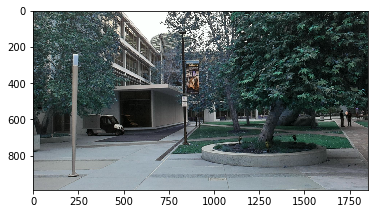

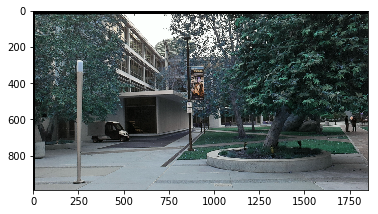

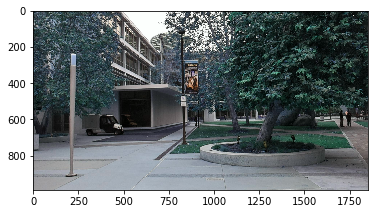

In [105]:
dest_L=cv2.remap(src=iL,map1=mapLx,map2=mapLy,interpolation=cv2.INTER_CUBIC)
plt.imshow(oL)
plt.show()
plt.imshow(dest_L)
plt.show()
plt.imshow(oR)
plt.show()

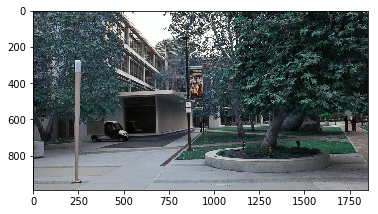

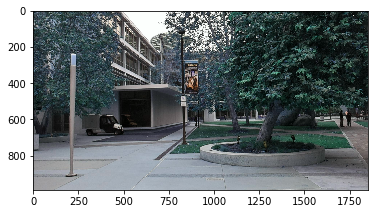

In [106]:
dest_R=cv2.remap(src=iR,map1=mapRx,map2=mapRy,interpolation=cv2.INTER_CUBIC,)
plt.imshow(dest_R)
plt.show()
plt.imshow(oR)
plt.show()

In [222]:
mapLx,mapLy=cv2.initUndistortRectifyMap(cameraMatrix=intrinsic_L,
                            distCoeffs=dist_coeffs_L,
                            R=np.eye(3),
                            newCameraMatrix=new_camera_matrix,
                            size=(oL.shape[1],oL.shape[0]),
                            m1type=cv2.CV_32FC1)
#                             map1=mapLx,
#                             map2=mapLy)

In [224]:
mapLy.shape

(990, 1852)

In [173]:
# def get_inv_mapping(mapx,mapy,table_shape,k=5):
'''    
have final_image[x,y]=original_image[mapx(x,y),mapy(x,y)]
want invmapx, invmapy such that
final_image[invmapx(x,y),invmap(x,y)] = original_image[x,y]
map has shape table_shape[1], table_shape[0], where you get xout=invmapx[y,x], yout=invmapx[y,x]
'''   
from sklearn.neighbors import KDTree
points=mapL.reshape(-1, 2)
print(points.shape)
tree=KDTree(points)

(1833480, 2)


In [195]:
table_shape=iL.shape[:2]
invmapx=np.zeros((table_shape[1],table_shape[0]))
invmapy=np.zeros((table_shape[1],table_shape[0]))
print(invmapx.shape)

(1920, 1080)


In [213]:
k=15

In [206]:
print(mapL.shape)

(990, 1852, 2)


In [205]:
dists,idxs=tree.query(X=np.asarray(mapL[1,0]).reshape(1,-1),k=1)
print(dists,idxs)

IndexError: index 990 is out of bounds for axis 0 with size 990

In [240]:
def invert_mapping(iL_shape,oL_shape,mapx,mapy):
    
    from sklearn.neighbors import KDTree
    points=np.asarray(list(zip(mapx.reshape(-1, 1),mapy.reshape(-1, 1)))).reshape(-1,2)
    print(points.shape)
    tree=KDTree(points)
    
    table_shape=iL_shape[:2]
    invmapx=np.zeros((table_shape[1],table_shape[0]))
    invmapy=np.zeros((table_shape[1],table_shape[0]))
    print(invmapx.shape)
    for yd in range(iL_shape[0]):
        for xd in range(iL_shape[1]):

            dists,idxs=tree.query(X=np.asarray([xd,yd]).reshape((1,2)),k=k,dualtree=True)
            idxs=np.asarray(idxs).ravel()
            dists=np.asarray(dists).ravel()
            if dists[0]==0.0:
                invmapx[xd,yd]=int(idxs[0]%oL.shape[1])
                invmapy[xd,yd]=idxs[0]/oL.shape[1]
            else:
                xnumr8r=np.sum([(idxs[j]%oL_shape[1])/(dists[j]**2) for j in range(k)])
                ynumr8r=np.sum([(idxs[j]/oL_shape[1])/(dists[j]**2) for j in range(k)])
                denom=np.sum([(1.0/dists[j]**2) for j in range(k)])
                invmapx[xd,yd]=xnumr8r/denom
                invmapy[xd,yd]=ynumr8r/denom
    return invmapx,invmapy
#             for n,idx in enumerate(idxs):
#                 if dists[n]==0.0:
#                     invmapx[y,x]=`
# table_shape=iL.shape[:2]
# invmapx,invmapy=get_inv_mapping(mapLx,mapLy,table_shape)
# table2_shape=oL.shape[:2]
# rev_mapx,revmapy=get_inv_mapping(invmapx,invmapy,table2_shape)

In [235]:
table_shape=iL.shape[:2]
invmapx,invmapy=invert_mapping(table_shape,mapLx,mapLy)

(1833480, 2)
(1920, 1080)


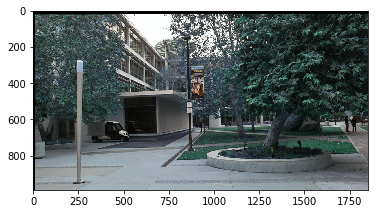

In [238]:
ol_remapped=cv2.remap(iL,mapLx,mapLy,cv2.INTER_LINEAR)
plt.imshow(ol_remapped)

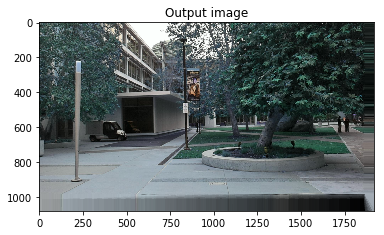

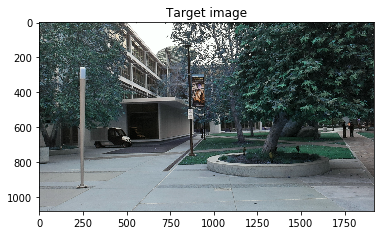

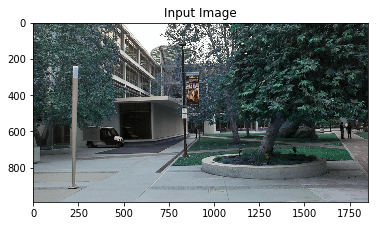

In [236]:
inv_mapxT=invmapx.T.astype(np.float32)
inv_mapyT=invmapy.T.astype(np.float32)
# print(inv_mapxT.shape)
iL_remapped=cv2.remap(oL,inv_mapxT,inv_mapyT,cv2.INTER_LINEAR)
plt.imshow(iL_remapped)
plt.title("Output image")
plt.show()
plt.imshow(iL)
plt.title("Target image")
plt.show()
plt.imshow(oL)
plt.title("Input Image")
plt.show()

In [241]:
table2_shape=oL.shape[:2]
input_image_shape=iL.shape[:2]
revmapx,revmapy=invert_mapping(table2_shape,input_image_shape,inv_mapxT,inv_mapyT)

(2073600, 2)
(1852, 990)


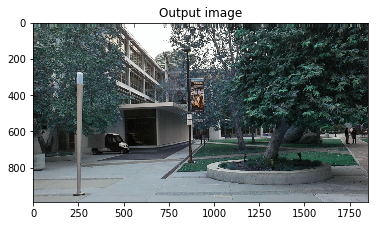

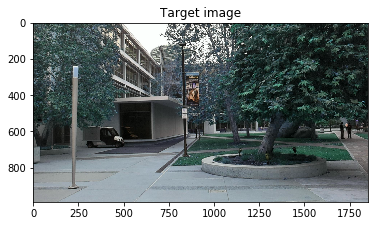

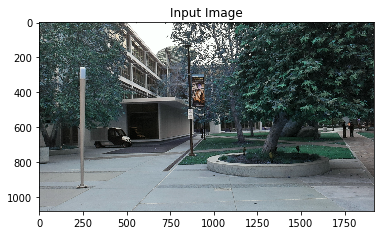

In [242]:
inv_mapxRT=revmapx.T.astype(np.float32)
inv_mapyRT=revmapy.T.astype(np.float32)
# print(inv_mapxT.shape)
iL_remapped=cv2.remap(iL,inv_mapxRT,inv_mapyRT,cv2.INTER_LINEAR)
plt.imshow(iL_remapped)
plt.title("Output image")
plt.show()
plt.imshow(oL)
plt.title("Target image")
plt.show()
plt.imshow(iL)
plt.title("Input Image")
plt.show()

In [ ]:
for yd in range(iL.shape[0]):
    for xd in range(iL.shape[1]):
        
        dists,idxs=tree.query(X=np.asarray([xd,yd]).reshape((1,2)),k=k,dualtree=True)
#         xnearest=tree.data[idxs[0][0]][0]
#         ynearest=tree.data[idxs[0][0]][1]
#         print(xnearest,ynearest,x,y)
#         break
#     break
        idxs=np.asarray(idxs).ravel()
        dists=np.asarray(dists).ravel()
#         invmapx[y,x]=tree.data[idxs[0][0]][0]
#         invmapy[y,x]=tree.data[idxs[0][0]][1]
#         print(idxs)
        if dists[0]==0.0:
            invmapx[xd,yd]=int(idxs[0]%oL.shape[1])
            invmapy[xd,yd]=idxs[0]/oL.shape[1]
        else:
            xnumr8r=np.sum([(idxs[j]%oL.shape[1])/(dists[j]**2) for j in range(k)])
            ynumr8r=np.sum([(idxs[j]/oL.shape[1])/(dists[j]**2) for j in range(k)])
            denom=np.sum([(1.0/dists[j]**2) for j in range(k)])
            invmapx[xd,yd]=xnumr8r/denom
            invmapy[xd,yd]=ynumr8r/denom

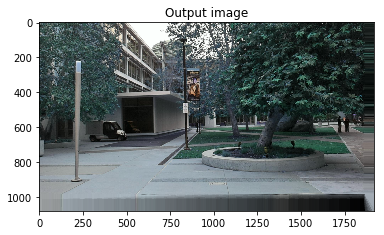

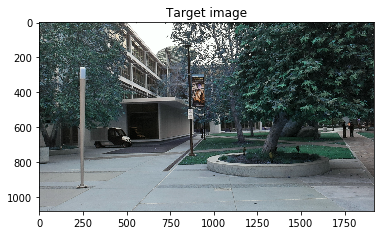

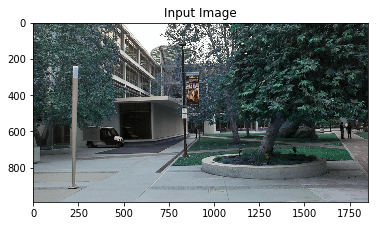

In [218]:
inv_mapxT=invmapx.T.astype(np.float32)
inv_mapyT=invmapy.T.astype(np.float32)
# print(inv_mapxT.shape)
iL_remapped=cv2.remap(oL,inv_mapxT,inv_mapyT,cv2.INTER_LINEAR)
plt.imshow(iL_remapped)
plt.title("Output image")
plt.show()
plt.imshow(iL)
plt.title("Target image")
plt.show()
plt.imshow(oL)
plt.title("Input Image")
plt.show()

In [107]:
# dst_ud=cv2.undistort(src=iL,cameraMatrix = intrinsic_L,distCoeffs=dist_coeffs_L,newCameraMatrix=new_camera_matrix)
# plt.imshow(dst_ud)
# plt.show()
# plt.imshow(oL)